In [6]:
from keras.models import load_model
import pickle

model_1 = load_model('models\\version1\\emotion_prediction_model.h5')
tokenizer_1_path = ('models\\version1\\tokenizer.pickle')
LABEL_MAP_1 = {25: 'sadness', 0: 'admiration', 27: 'neutral', 18: 'love', 15: 'gratitude', 10: 'disapproval', 1: 'amusement', 9: 'disappointment', 22: 'realization', 3: 'annoyance', 6: 'confusion', 20: 'optimism', 7: 'curiosity', 13: 'excitement', 5: 'caring', 11: 'disgust', 24: 'remorse', 17: 'joy', 4: 'approval', 12: 'embarrassment', 26: 'surprise', 2: 'anger', 16: 'grief', 21: 'pride', 8: 'desire', 23: 'relief', 14: 'fear', 19: 'nervousness'}

model_2 = load_model('models\\version2\\emotion_prediction_model.h5')
tokenizer_2_path = ('models\\version2\\tokenizer.pickle')
LABEL_MAP_2 = {0: 'anger', 1: 'disgust', 2: 'neutral', 3: 'surprise', 4: 'joy', 5: 'sadness', 6: 'fear'}

with open(tokenizer_1_path, 'rb') as handle:
        tokenizer_1 = pickle.load(handle)

with open(tokenizer_2_path, 'rb') as handle:
        tokenizer_2 = pickle.load(handle)

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# ทดสอบด้วยข้อมูลที่กำหนดเอง
sample_data =  [
    ("I can't believe they did that!", "anger"),
    ("That food smelled absolutely terrible!", "disgust"),
    ("I'm not sure how I feel about this.", "neutral"),
    ("Wow! I didn't see that coming!", "surprise"),
    ("Today is the best day of my life!", "joy"),
    ("I feel so down and hopeless right now.", "sadness"),
    ("I don't want to go in there, it's too scary.", "fear"),
    ("Why would you do something like that?!", "anger"),
    ("This tastes horrible, I can't eat it.", "disgust"),
    ("I don't really have an opinion on this.", "neutral"),
    ("That plot twist was totally unexpected!", "surprise"),
    ("I feel so grateful and happy today.", "joy"),
    ("Losing my pet made me feel so heartbroken.", "sadness"),
    ("I'm terrified of the dark.", "fear"),
    ("I am beyond furious right now!", "anger"),
    ("I can't even look at that, it's so gross!", "disgust"),
    ("I just feel empty and indifferent.", "neutral"),
    ("I never expected that to happen!", "surprise"),
    ("This moment is pure happiness!", "joy"),
    ("Hearing that news made me cry.", "sadness"),
]

# df = pd.read_csv('datasets/goemotions_cleaned.csv')
# df_filtered = df[df['emotion'].isin(LABEL_MAP_2.keys())]

# สุ่มข้อมูลอะไรก็ได้ตามจำนวนที่กำหนด
# sample_data = df_filtered.sample(20)
# sample_data = sample_data[['text', 'emotion']].values.tolist()

# สุ่มข้อมูลโดยแต่ละ class ตามจำนวนที่กำหนด
# samples_per_class = 50
# sampled_data = df_filtered.groupby('emotion', group_keys=False).apply(lambda x: x.sample(min(len(x), samples_per_class)))
# sampled_data = sampled_data[['text', 'emotion']].values.tolist()
# sampled_data


In [ ]:
# แปลงข้อความให้เป็นรูปแบบ tokenizer แล้วทำการทำนายผล
def predict_emotion(model, tokenizer, label_map, text):
    sequences = tokenizer.texts_to_sequences([text])
    padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=100)
    predictions = model.predict(padded)[0]
    
    if isinstance(label_map, dict):
        predicted_class = np.argmax(predictions)
        return label_map.get(predicted_class, "Unknown")
    elif isinstance(label_map, list):
        predicted_class = np.argmax(predictions)
        return label_map[predicted_class] if predicted_class < len(label_map) else "Unknown"

In [ ]:
# ข้อมูลที่ทำนายได้
actual_labels = [label for _, label in sample_data]
predictions_1 = [predict_emotion(model_1, tokenizer_1, LABEL_MAP_1, text) for text, _ in sample_data]
predictions_2 = [predict_emotion(model_2, tokenizer_2, LABEL_MAP_2, text) for text, _ in sample_data]

# คำนวณความแม่นยำ
accuracy_1 = accuracy_score(actual_labels, predictions_1)
accuracy_2 = accuracy_score(actual_labels, predictions_2)

# สร้าง confusion matrix
conf_matrix_1 = confusion_matrix(actual_labels, predictions_1, labels=list(set(actual_labels + list(LABEL_MAP_1.values()))))
conf_matrix_2 = confusion_matrix(actual_labels, predictions_2, labels=list(set(actual_labels + list(LABEL_MAP_2.values()))))

accuracy_df = pd.DataFrame({
    "Model": ["Version 1", "Version 2"],
    "Accuracy": [accuracy_1, accuracy_2]
})

accuracy_df

1/1 [==============================] - 0s 93ms/step


,Model,Accuracy
0,Version 1,0.55
1,Version 2,0.50


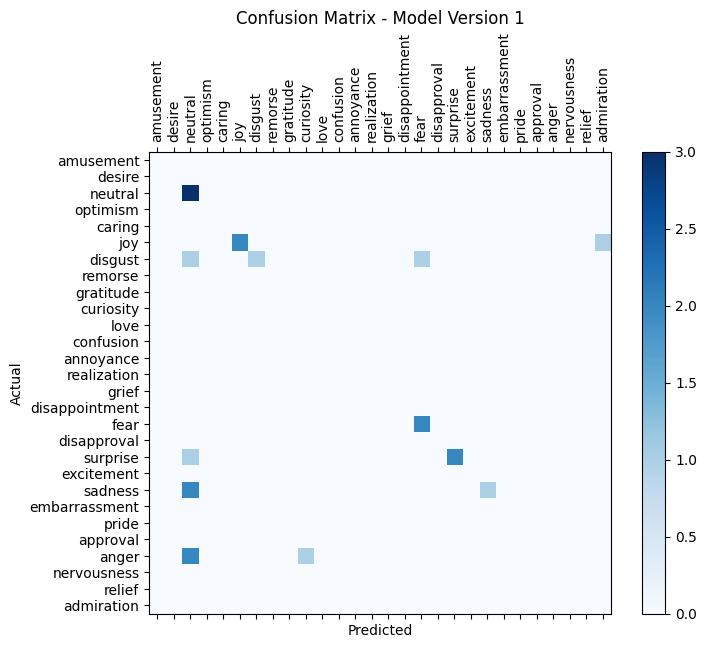

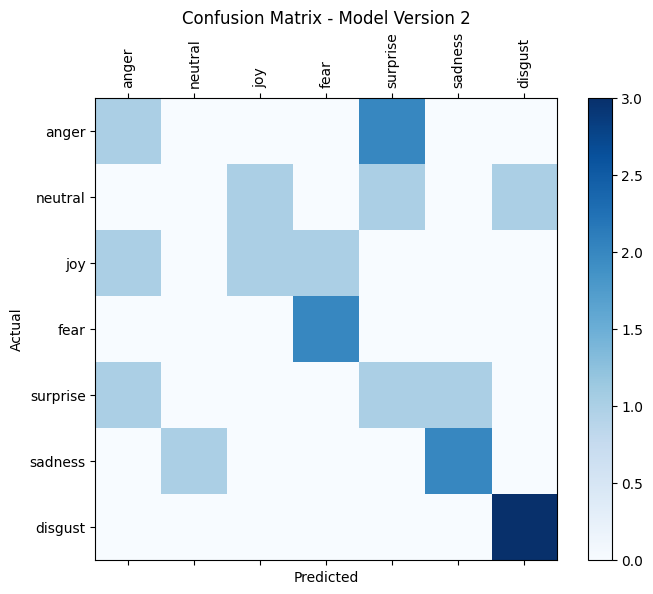

In [ ]:
def plot_confusion_matrix(cm, labels, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    cax = ax.matshow(cm, cmap='Blues')
    plt.colorbar(cax)
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticklabels(labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(conf_matrix_1, list(set(actual_labels + list(LABEL_MAP_1.values()))), "Confusion Matrix - Model Version 1")
plot_confusion_matrix(conf_matrix_2, list(set(actual_labels + list(LABEL_MAP_2.values()))), "Confusion Matrix - Model Version 2")